
1. NAME  : Maitri Mistry
2. GitHub Username : msmistry
3. USC ID: 7247162517





In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import DistanceMetric
knn = KNeighborsClassifier()
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from collections import Counter

# a. Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column




In [10]:
data = arff.loadarff('column_2C_weka.arff')
data = pd.DataFrame(data[0])


#B. Pre-Processing

In [11]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [12]:
data.describe()


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [14]:
data.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [15]:
data['class'].value_counts()

class
b'Abnormal'    210
b'Normal'      100
Name: count, dtype: int64

In [16]:
data.apply(lambda x: len(x.unique()))

pelvic_incidence            310
pelvic_tilt                 310
lumbar_lordosis_angle       280
sacral_slope                281
pelvic_radius               310
degree_spondylolisthesis    310
class                         2
dtype: int64

In [17]:
data["class"] = le.fit_transform(data["class"])

In [18]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


#B. Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

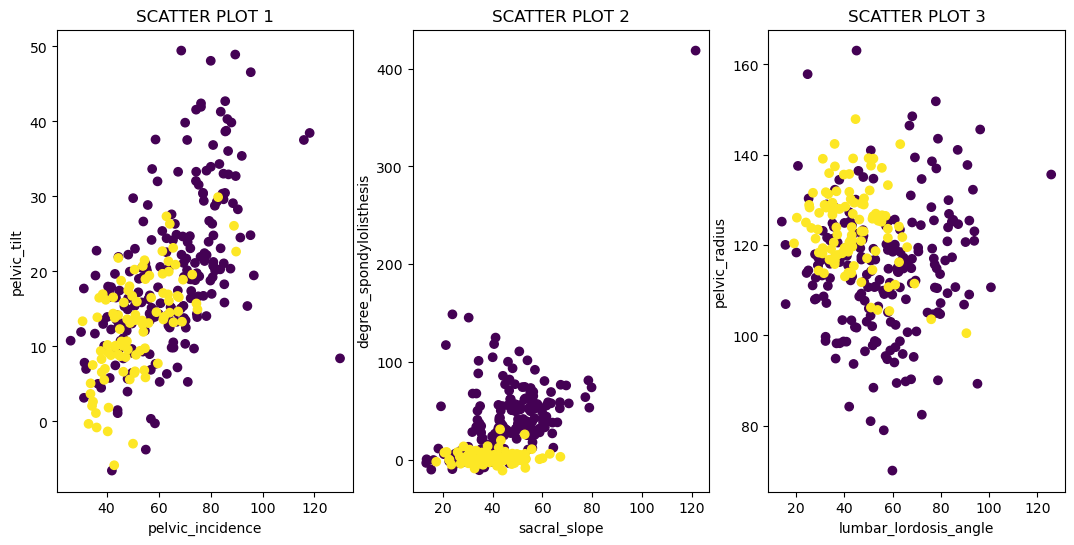

In [19]:
plt.figure(figsize=(13,6))
plt.subplot(131)
plot = plt.scatter(data['pelvic_incidence'], data['pelvic_tilt'], c=data['class'])
plt.title('SCATTER PLOT 1')
plt.xlabel('pelvic_incidence')
plt.ylabel('pelvic_tilt')
plt.subplot(132)
plt.title('SCATTER PLOT 2')
plot = plt.scatter(data['sacral_slope'], data['degree_spondylolisthesis'], c=data['class'])
plt.xlabel('sacral_slope')
plt.ylabel('degree_spondylolisthesis')
plt.subplot(133)
plt.title('SCATTER PLOT 3')
plot = plt.scatter(data['lumbar_lordosis_angle'], data['pelvic_radius'], c=data['class'])
plt.xlabel('lumbar_lordosis_angle')
plt.ylabel('pelvic_radius')
plt.show()

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

In [20]:
sns.lmplot(x='sacral_slope', y='degree_spondylolisthesis', hue='class', data=data, fit_reg=False)

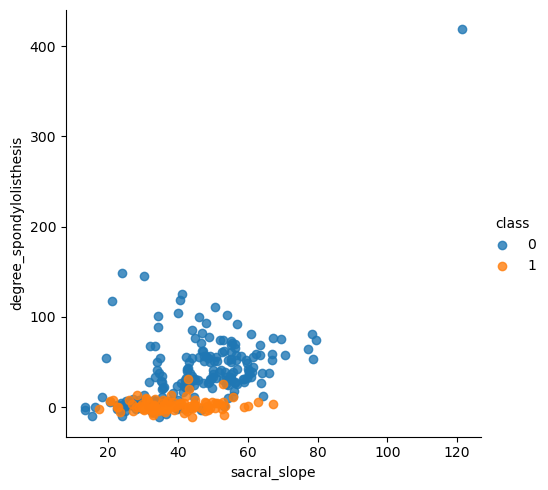

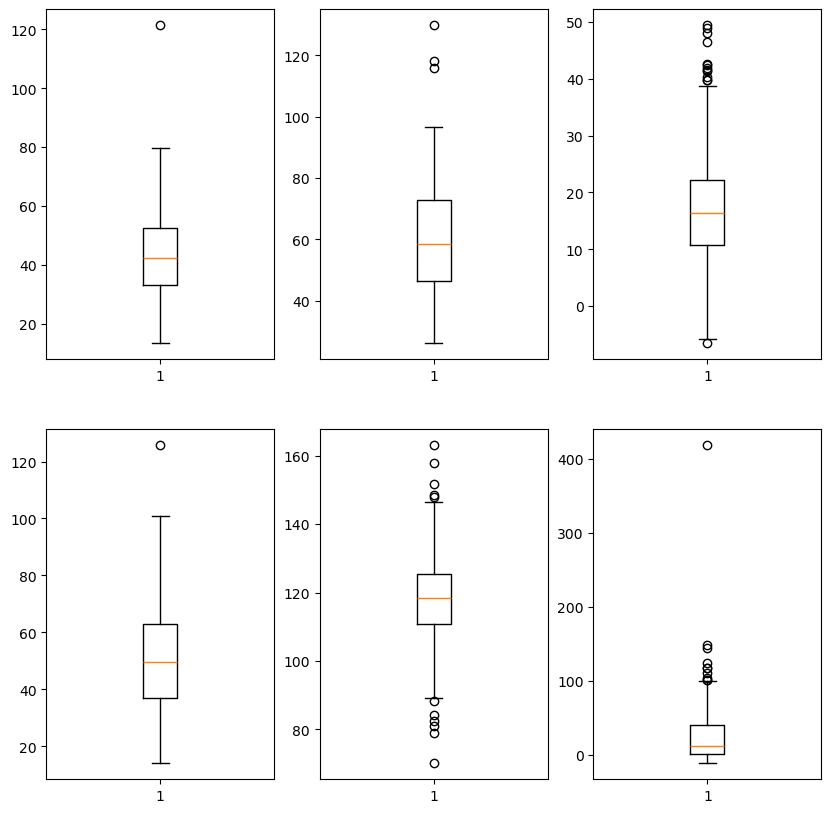

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(231)
plot = plt.boxplot(data['sacral_slope'])
plt.subplot(232)
plot = plt.boxplot(data['pelvic_incidence'])
plt.subplot(233)
plot = plt.boxplot(data['pelvic_tilt'])
plt.subplot(234)
plot = plt.boxplot(data['lumbar_lordosis_angle'])
plt.subplot(235)
plot = plt.boxplot(data['pelvic_radius'])
plt.subplot(236)
plot = plt.boxplot(data['degree_spondylolisthesis'])
plt.show()

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set

In [22]:
#train_set
class_0 = data[data['class'] == 0].iloc[:70]#Oversample Class 1 (e.g., SMOTE). Undersample Class 0.
class_1 = data[data['class'] == 1].iloc[:70]#140
train_set = pd.concat([class_0, class_1]).sample(frac=1, random_state=42).reset_index(drop=True)
#test_set
class_0 = data[data['class'] == 0].iloc[70:]
class_1 = data[data['class'] == 1].iloc[70:]#140
test_set = pd.concat([class_0, class_1]).sample(frac=1, random_state=42).reset_index(drop=True)

In [23]:
train_set.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,47.319648,8.573680,35.560252,38.745967,120.576972,1.630664,1
1,75.649731,19.339799,64.148685,56.309932,95.903629,69.551303,0
2,46.390260,11.079047,32.136553,35.311213,98.774546,6.386832,0
3,63.619192,16.934508,49.349262,46.684684,117.089747,-0.357812,1
4,53.854798,19.230643,32.779060,34.624155,121.670915,5.329843,0


In [24]:
test_set.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,0
1,84.585607,30.361685,65.479486,54.223922,108.010218,25.118478,0
2,82.406524,29.276422,77.054565,53.130102,117.042244,62.765348,0
3,58.521623,13.922286,41.467855,44.599337,115.514798,30.387984,0
4,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,1


In [25]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']
X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

In [26]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          170 non-null    float64
 1   pelvic_tilt               170 non-null    float64
 2   lumbar_lordosis_angle     170 non-null    float64
 3   sacral_slope              170 non-null    float64
 4   pelvic_radius             170 non-null    float64
 5   degree_spondylolisthesis  170 non-null    float64
dtypes: float64(6)
memory usage: 8.1 KB


In [27]:
train_errors = []
test_errors = []
k_values = list(range(140, 1, -4)) #Expected n_neighbors <= n_samples_fit, but n_neighbors = 280, n_samples_fit = 170, n_samples = 170
print(k_values)
best_test_error = float('inf')


[140, 136, 132, 128, 124, 120, 116, 112, 108, 104, 100, 96, 92, 88, 84, 80, 76, 72, 68, 64, 60, 56, 52, 48, 44, 40, 36, 32, 28, 24, 20, 16, 12, 8, 4]


# C. Classification using KNN on Vertebral Column Data Set
i. Write code for k-nearest neighbors with Euclidean metric (or use a software
package).


In [28]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

    if test_error < best_test_error:
        best_test_error = test_error
        best_k = k
print(best_k)
print(best_test_error)


4
0.12352941176470589


In [29]:
train_errors

[0.5,
 0.5,
 0.4928571428571429,
 0.4928571428571429,
 0.35,
 0.35,
 0.30714285714285716,
 0.2928571428571428,
 0.2571428571428571,
 0.27142857142857146,
 0.26428571428571423,
 0.2857142857142857,
 0.2785714285714286,
 0.27142857142857146,
 0.24285714285714288,
 0.24285714285714288,
 0.26428571428571423,
 0.2571428571428571,
 0.23571428571428577,
 0.22857142857142854,
 0.25,
 0.25,
 0.25,
 0.23571428571428577,
 0.24285714285714288,
 0.25,
 0.23571428571428577,
 0.22857142857142854,
 0.23571428571428577,
 0.2142857142857143,
 0.22142857142857142,
 0.22142857142857142,
 0.19285714285714284,
 0.23571428571428577,
 0.19285714285714284]

In [30]:
test_errors

[0.17647058823529416,
 0.788235294117647,
 0.7705882352941177,
 0.7352941176470589,
 0.7235294117647059,
 0.7294117647058824,
 0.7352941176470589,
 0.7352941176470589,
 0.7529411764705882,
 0.7470588235294118,
 0.7470588235294118,
 0.7235294117647059,
 0.711764705882353,
 0.6588235294117647,
 0.6058823529411765,
 0.5647058823529412,
 0.5352941176470588,
 0.5,
 0.4764705882352941,
 0.4882352941176471,
 0.5235294117647059,
 0.5058823529411764,
 0.5117647058823529,
 0.5117647058823529,
 0.5470588235294118,
 0.5588235294117647,
 0.5823529411764705,
 0.5411764705882354,
 0.5411764705882354,
 0.43529411764705883,
 0.30000000000000004,
 0.2529411764705882,
 0.1941176470588235,
 0.1705882352941176,
 0.12352941176470589]

In [31]:
k_values

[140,
 136,
 132,
 128,
 124,
 120,
 116,
 112,
 108,
 104,
 100,
 96,
 92,
 88,
 84,
 80,
 76,
 72,
 68,
 64,
 60,
 56,
 52,
 48,
 44,
 40,
 36,
 32,
 28,
 24,
 20,
 16,
 12,
 8,
 4]

In [32]:
print(len(train_errors))
print(len(test_errors))
print(len(k_values))

35
35
35


ii. Test all data in the test database using k-nearest neighbors (KNN) and make decisions by majority polling. Plot train and test errors for k values in reverse order, specifically for k ∈ {208, 205, ..., 7, 4, 1}. Smaller increments of k can also be used. Identify the most suitable k, denoted as k*. Calculate the confusion matrix, true positive rate (TPR), true negative rate (TNR), precision, and F1-score for k = k*.


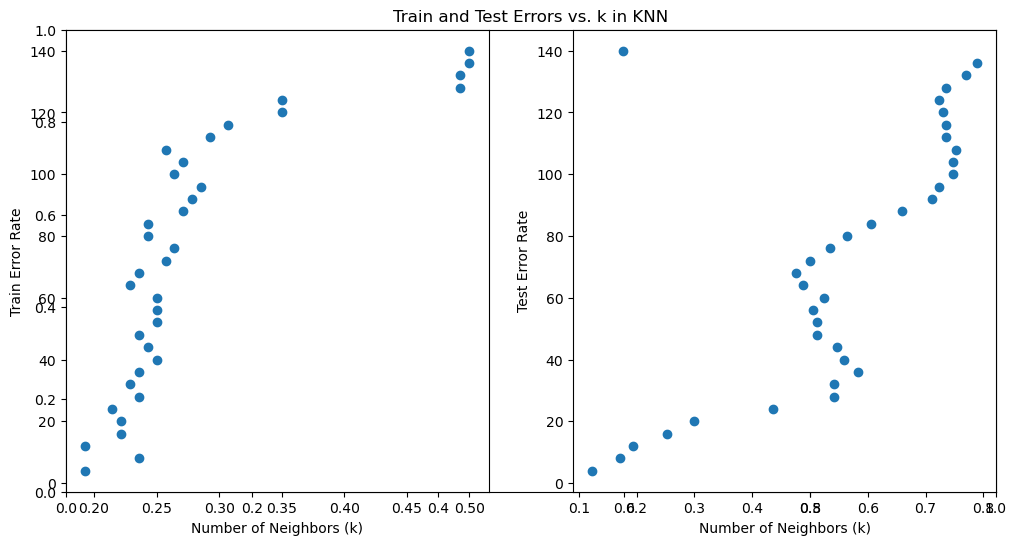

In [33]:
plt.figure(figsize=(12, 6))
plt.title("Train and Test Errors vs. k in KNN")
plt.subplot(121)
plt.scatter(train_errors, k_values, label="Train Error")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Train Error Rate")
plt.subplot(122)
plt.scatter(test_errors, k_values, label="Train Error")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Test Error Rate")
plt.show()

In [34]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
TN, FP, FN, TP = conf_matrix.ravel()
TPR = recall_score(y_test, y_test_pred)
TNR = TN / (TN + FP)
f1 = f1_score(y_test, y_test_pred)


In [35]:
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nTPR:", TPR)
print("\nTNR:", TNR)
print("\nPrecision:", precision)
print("\nF1 Score:", f1)

Confusion Matrix:
 [[131   9]
 [ 12  18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       140
           1       0.67      0.60      0.63        30

    accuracy                           0.88       170
   macro avg       0.79      0.77      0.78       170
weighted avg       0.87      0.88      0.87       170


TPR: 0.6

TNR: 0.9357142857142857

Precision: 0.6666666666666666

F1 Score: 0.631578947368421


iii. Since computation time depends on the size of the training set, use only a subset of the training data. Plot the best test error rate, obtained for some k, against the training set size N, where N ∈ {10, 20, 30, ..., 210}. For each N, select the training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N - ⌊N/3⌋ rows of Class 1 from the training set created in 1(b)iii. For each N, determine the optimal k from a set starting at k = 1 and increasing by 5 (e.g., if N = 200, choose k from {1, 6, 11, ..., 196}). This plot is called *a Learning Curve*.

In [36]:
train_sizes = np.arange(10, 111, 10)  # Expected n_neighbors <= n_samples_fit, but n_neighbors = 156, n_samples_fit = 153, n_samples = 140
best_test_errors = []

for N in train_sizes:
    N_class0 = N // 3
    N_class1 = N - N_class0

    train_subset = pd.concat([train_set[train_set['class'] == 0].iloc[:N_class0],
                              train_set[train_set['class'] == 1].iloc[:N_class1]])

    X_train_sub = train_subset.drop(columns=['class'])
    y_train_sub = train_subset['class']

    k_values = np.arange(1, N-3, 5)
    best_k = None
    best_error = float("inf")

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train_sub, y_train_sub)
        y_pred = knn.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_pred)

        if test_error < best_error:
            best_error = test_error
            best_k = k
    best_test_errors.append(best_error)

In [37]:
print(best_test_errors)

[0.30000000000000004, 0.19999999999999996, 0.24117647058823533, 0.23529411764705888, 0.23529411764705888, 0.1941176470588235, 0.21764705882352942, 0.23529411764705888, 0.21176470588235297, 0.19999999999999996, 0.18823529411764706]


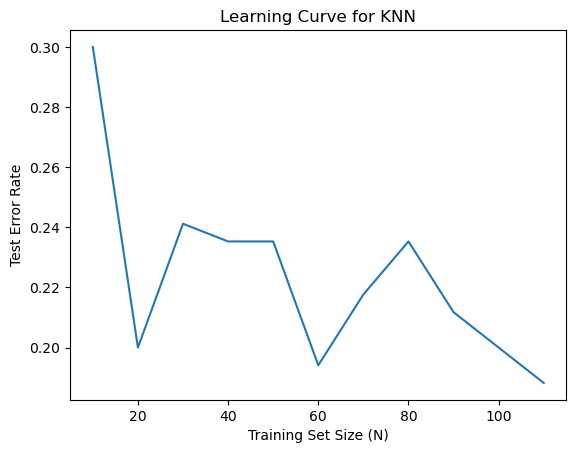

In [38]:
sns.lineplot(x=train_sizes, y=best_test_errors)
plt.xlabel("Training Set Size (N)")
plt.ylabel("Test Error Rate")
plt.title("Learning Curve for KNN")
plt.show()

### D. Replace the Euclidean metric with the following alternative metrics and test them. Summarize the test errors when k = k* in a table. Use the entire training dataset and select the best k from {1, 6, 11, ..., 196}.
**1. Minkowski Distance:**

1. A. Compute test errors using Manhattan Distance (p = 1).
2. B. Compute test errors for Minkowski Distance with log10(p) ∈ {0.1, 0.2, 0.3, ..., 1}, using k* from the Manhattan Distance case. Identify the best log10(p).
3. C. Compute test errors using Chebyshev Distance (p → ∞).


In [39]:
k_values = np.arange(1, 111, 5)
best_k = None
best_error = float("inf")

for k in k_values:
     knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
     knn.fit(X_train_sub, y_train_sub)
     y_pred = knn.predict(X_test)
     test_error = 1 - accuracy_score(y_test, y_pred)

     if test_error < best_error:
         best_error = test_error
         best_k = k
     best_test_errors.append(best_error)

In [40]:
manhattan = DistanceMetric.get_metric('minkowski', p=1)
manhattan = manhattan.pairwise(X_test, X_train)
manhattan

array([[ 68.8642207 , 124.82796769,  40.71859282, ...,  73.25257972,
         75.31044625,  96.96416281],
       [140.5057211 ,  79.91398689, 137.7009452 , ..., 101.19814654,
        152.72246523, 178.99627371],
       [176.33747921,  60.70369596, 191.59675411, ..., 137.50121885,
        188.55422334, 214.82803182],
       ...,
       [141.47162481, 100.84872014, 156.93084807, ..., 100.07248077,
        136.67595906, 162.94976754],
       [268.89381721, 117.67156474, 247.61769697, ..., 229.58624265,
        281.11056134, 307.38436982],
       [ 73.26896945, 108.99645382,  51.99284921, ...,  63.14720513,
         86.20079382, 111.75952206]])

In [41]:
for p in [10**i for i in np.arange(0.1, 1.1, 0.1)]:
    minkowski = DistanceMetric.get_metric('minkowski', p=p)
    minkowski = minkowski.pairwise(X_test, X_train)
minkowski

array([[28.1320935 , 41.37717144, 21.95696931, ..., 23.87148973,
        34.04121154, 37.0478251 ],
       [37.7108424 , 44.43283888, 39.08764265, ..., 27.61955782,
        41.54290263, 46.32851781],
       [61.28372138, 21.15493199, 56.9925574 , ..., 57.00959103,
        61.8946454 , 64.22195559],
       ...,
       [48.65636114, 28.98532026, 44.02223544, ..., 44.36204771,
        49.27438139, 51.32427073],
       [76.82669392, 42.50732445, 75.03503221, ..., 70.300759  ,
        79.5560438 , 82.81688665],
       [26.99007055, 48.44444566, 14.89501312, ..., 23.15407012,
        34.84067132, 37.91059117]])

In [42]:
chebyshev = DistanceMetric.get_metric('chebyshev')
chebyshev = chebyshev.pairwise(X_test, X_train)
chebyshev

array([[26.71313563, 41.20750378, 21.95696749, ..., 22.5768522 ,
        33.63538563, 36.70208383],
       [37.26595955, 44.43282446, 38.19534702, ..., 27.28538054,
        41.46765607, 45.49834261],
       [61.1346848 , 21.1386151 , 56.37851666, ..., 56.99840137,
        61.7944219 , 63.52480966],
       ...,
       [48.49679338, 28.3633782 , 43.74062524, ..., 44.36050995,
        49.15653048, 50.88691824],
       [72.41310385, 42.49492344, 71.75439472, ..., 68.27682042,
        75.02670377, 79.05739031],
       [26.88476327, 48.44318157, 14.7212897 , ..., 23.11437817,
        34.82551307, 37.89221127]])

**2. Mahalanobis Distance**

In [43]:
mahalanobis  = DistanceMetric.get_metric('mahalanobis', V=np.cov(X_train.T))
mahalanobis  = mahalanobis.pairwise(X_test, X_train)
mahalanobis

array([[ 3.78984732,  3.68907205,  2.05239264, ...,  3.81060439,
         4.24539462,  4.63029067],
       [ 3.32066482,  4.98577443,  3.66213463, ...,  2.54324759,
         3.96178455,  4.53876822],
       [ 5.20036746,  3.11421848,  5.21391342, ...,  4.47100847,
         5.18946889,  5.56992062],
       ...,
       [ 5.44461736,  5.2494279 ,  5.75129367, ...,  4.14505767,
         4.9748015 ,  5.71327379],
       [ 9.2771444 ,  6.40157359,  8.37088573, ...,  9.32077542,
        10.39608568,  9.5671705 ],
       [ 3.11203138,  3.88805861,  1.34621054, ...,  3.52856732,
         3.98994079,  4.18115161]])

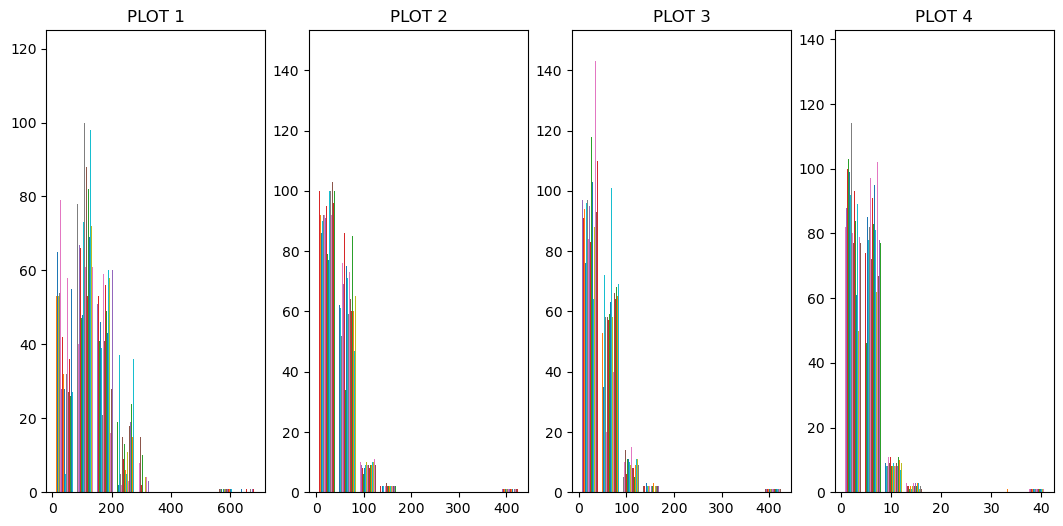

In [44]:
plt.figure(figsize=(13,6))
plt.subplot(141)
plot = plt.hist(manhattan)
plt.title('PLOT 1')
plt.subplot(142)
plt.title('PLOT 2')
plot = plt.hist(minkowski)
plt.subplot(143)
plt.title('PLOT 3')
plot = plt.hist(chebyshev)
plt.subplot(144)
plt.title('PLOT 4')
plot = plt.hist(mahalanobis)
plt.show()

In [45]:
k_values

array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106])

# E. The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, ..., 196}.

In [46]:
def weighted_knn(X_train, y_train, X_test, distances, k_values):
    errors = {}

    for k in k_values:
        correct = 0
        for i, dists in enumerate(distances):
            knn_indices = np.argsort(dists)[:k]
            knn_distances = dists[knn_indices]
            knn_labels = y_train[knn_indices]
            weights = 1 / (knn_distances + 1e-10)

            class_votes = {}
            for j, label in enumerate(knn_labels):
                class_votes[label] = class_votes.get(label, 0) + weights[j]

            predicted_label = max(class_votes, key=class_votes.get)

            if predicted_label == y_test[i]:
                correct += 1

        errors[k] = 1 - (correct / len(X_test))

    return errors

k_values = list(range(1, 201, 5))



In [47]:
manhattan_error = weighted_knn(X_train, y_train, X_test, manhattan, k_values)
minkowski_error = weighted_knn(X_train, y_train, X_test, minkowski, k_values)
chebyshev_error = weighted_knn(X_train, y_train, X_test, chebyshev, k_values)


In [48]:
results = pd.DataFrame({
    'k': k_values,
    'Manhattan Error': [manhattan_error[k] for k in k_values],
    'Minkowski Error': [minkowski_error[k] for k in k_values],
    'Chebyshev Error': [chebyshev_error[k] for k in k_values]
})

In [49]:
print(results)

      k  Manhattan Error  Minkowski Error  Chebyshev Error
0     1         0.276471         0.182353         0.188235
1     6         0.276471         0.152941         0.158824
2    11         0.329412         0.147059         0.152941
3    16         0.335294         0.188235         0.176471
4    21         0.382353         0.182353         0.170588
5    26         0.429412         0.176471         0.164706
6    31         0.458824         0.200000         0.170588
7    36         0.529412         0.211765         0.194118
8    41         0.541176         0.223529         0.188235
9    46         0.588235         0.229412         0.188235
10   51         0.594118         0.217647         0.170588
11   56         0.594118         0.217647         0.194118
12   61         0.541176         0.217647         0.194118
13   66         0.535294         0.217647         0.200000
14   71         0.558824         0.217647         0.194118
15   76         0.576471         0.235294         0.2294

# F. What is the lowest training error rate you achieved in this homework?


In [50]:
min(train_errors)


0.19285714285714284

# Refrences and Prompts


1. prompt - describe .ravel(), and why is F1-score calculated this way?
2. prompt - Why use float("inf")
3. prompt - what is 1e-10 in weights = 1 / (knn_distances + 1e-10) used for?
4. prompt - What is the purpose of distances instead of calculatin them in the function?
5. prompt - working of np.argsort(dists)[:k]
6. prompt - implemention of class votes using weighted voting in KNN?
7. prompt - calculate the classification error between predicted values and actual values
8. prompt - update dictionary by adding weights to the class vote for each label
9. prompt - np.argsort(dists)[:k] in selecting nearest neighbors, how is it used to retrieve labels from y_train
10. describe dists[knn_indices]
11. errors[k] = 1 - (correct / len(X_test))
12. https://www.youtube.com/watch?v=3wBtZVyzbu4
13. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
14. https://www.youtube.com/watch?v=OO7Y5wQWnQs&t=468s
15.  https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/
16. https://www.youtube.com/shorts/HmpfWjCftAs